# Euler's Method for ODEs

## Basic Explicit Euler
A first order linear ODE: $ a_0(x) y + a_1(x) y' + b(x) = 0$, can be rewritten as: $y'= \frac{dy}{dx} = f(x,y)$.

The explicit Euler method uses $f(x_i,y_i)$ as the slope at the start of an interval to predict $y_{i+1}$ at the end of the interval, i.e. where $x_{i+1} = x_i + h$.

$y_{i+1}^{Euler} = y_i + f(x_i,y_i) h$ where the initial value, $y(x_1) = y_1$, is given.

One step of explicit Euler is shown below.


![image info](./explicit_euler_onestep.jpg)

### Explicit Euler Example

$ \frac{dy}{dx} = \frac{1}{x}~~~~~~~~~ dy = \frac{dx}{x}~~~~~~~~~ \int dy = \int \frac{dx}{x}~~~~~~~~~ y=\ln{x} + C  $

So we end up with a solution for $y$ but we don't know what $C$ is. The way we can know $C$ is by specifying an *initial condition*. For example, if we knew

$ y(x=2.0)=0~~~~~~ 0 = ln(2.0) + C~~~~~~C = -ln(2.0) = -0.6931 $

So that the particular solution is

$ y_{TS} = ln(x) - 0.6931 $ Here, $TS$ is the true solution.


Now for implementing Euler's Method.

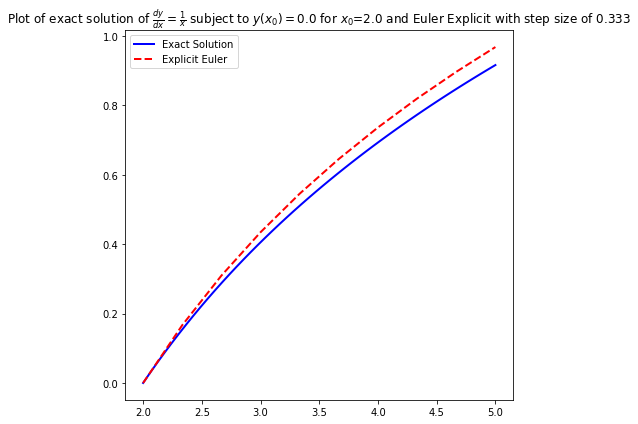

In [1]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sympy

fxy = lambda x: 1/x
fxy_lhs = "dy/dx"
fxy_rhs = "1/x"
#fn_string = "ln(x) - 0.6931"
fxy_lhs_syms = sympy.latex(sympy.sympify(fxy_lhs))
fxy_rhs_syms = sympy.latex(sympy.sympify(fxy_rhs))

a = 2.0    #initial value for x
b = 5.0    #final value for x
x_TS = np.linspace(a,b)
y_TS = [log(num)-0.6931 for num in x_TS] 

n = 10     #number of x values
h = (b-a)/(n-1)   #step size
x_euler = np.zeros(n)
y_euler = np.zeros(n)
iv = 0.0
y_euler[0] = iv      #initial condition
x_euler[0] = a

for i in range(1,n):
    x_euler[i] = a + i*h
    y_euler[i] = y_euler[i-1] + fxy(x_euler[i-1])*h


iv_lhs = f"y(x_0)"
iv_rhs = f"{str(iv)}"
iv_lhs_syms=sympy.latex(sympy.sympify(iv_lhs))
iv_rhs_syms=sympy.latex(sympy.sympify(iv_rhs))
    
fig = plt.figure(figsize=(6,6))
plt.plot(x_TS,y_TS,label="Exact Solution",color="b",linewidth="2.0")
plt.plot(x_euler,y_euler,label="Explicit Euler",color="r",linestyle="--",linewidth="2.0")
plt.title(f"Plot of exact solution of ${fxy_lhs_syms} = {fxy_rhs_syms}$ subject to ${iv_lhs_syms} = {iv_rhs_syms}$ for $x_0$={a} and Euler Explicit with step size of {h:.3f}")
plt.legend()
plt.tight_layout()
plt.show()

### Another Example...

Now let's use explicit Euler method to solve

$\frac{dy}{dx}=\frac{x^2}{y}$ from $x=0$ to $x=2.1$ with $y(0)=2$. Note the exact solution is

$y=\sqrt{\frac{2 x^3}{3}+4}$

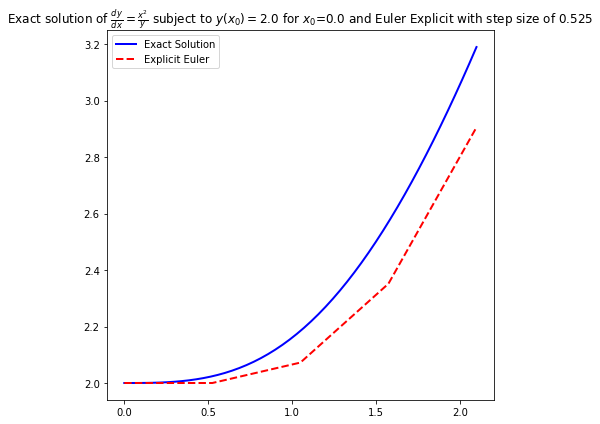

In [2]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sympy

fxy = lambda x,y: pow(x,2)/y
fxy_lhs = "dy/dx"
fxy_rhs = "x^2/y"
#fn_string = "ln(x) - 0.6931"
fxy_lhs_syms = sympy.latex(sympy.sympify(fxy_lhs))
fxy_rhs_syms = sympy.latex(sympy.sympify(fxy_rhs))

a = 0.0    #initial value for x
b = 2.1    #final value for x
x_TS = np.linspace(a,b)
y_TS = [sqrt(2*pow(num,3)/3+4) for num in x_TS] 

n = 5     #number of x values
h = (b-a)/(n-1)   #step size
x_euler = np.zeros(n)
y_euler = np.zeros(n)
iv = 2.0
y_euler[0] = iv      #initial condition
x_euler[0] = a

for i in range(1,n):
    x_euler[i] = a + i*h
    y_euler[i] = y_euler[i-1] + fxy(x_euler[i-1],y_euler[i-1])*h


iv_lhs = f"y(x_0)"
iv_rhs = f"{str(iv)}"
iv_lhs_syms=sympy.latex(sympy.sympify(iv_lhs))
iv_rhs_syms=sympy.latex(sympy.sympify(iv_rhs))
    
fig = plt.figure(figsize=(6,6))
plt.plot(x_TS,y_TS,label="Exact Solution",color="b",linewidth="2.0")
plt.plot(x_euler,y_euler,label="Explicit Euler",color="r",linestyle="--",linewidth="2.0")
plt.title(f"Exact solution of ${fxy_lhs_syms}={fxy_rhs_syms}$ subject to ${iv_lhs_syms}={iv_rhs_syms}$ for $x_0$={a} and Euler Explicit with step size of {h:.3f}")
plt.legend()
plt.tight_layout()
plt.show()

## Modified Euler Method - Heun's Method

Heun's method averages the slope at $x_i$ and the slope at $x_{i+1}$ to find a better approximation of the slope. The slope at $x_{i+1}$ is potentially not known (since it might depend on $y_{i+1})$, so instead, Heun's method uses the slope at $(x_{i+1},y_{i+1}^{Euler})$.

$\large y_{i+1}^{Heun} = y_i + \frac{f(x_i,y_i) + f(x_{i+1},y_{i+1}^{Euler})}{2} h$

![image info](./heun.jpg)




### Heun's Method Example

Now let's use Heun's method to solve $\frac{dy}{dx}=\frac{x^2}{y}$ from $x=0$ to $x=2.1$ with $y(0)=2$. Note the exact solution is

$y=\sqrt{\frac{2 x^3}{3}+4}$

This is a repeat of the last example except using Heun's method.

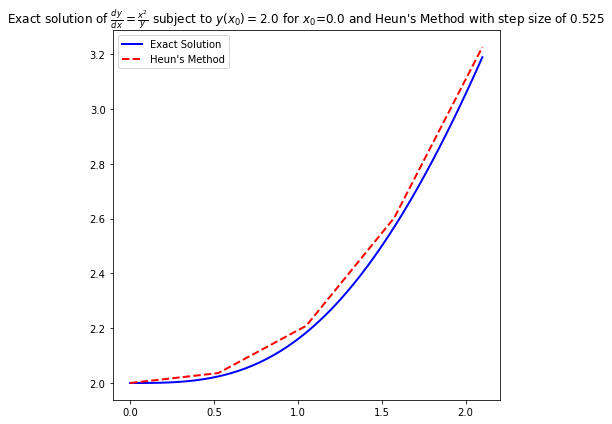

In [3]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sympy

fxy = lambda x,y: pow(x,2)/y
fxy_lhs = "dy/dx"
fxy_rhs = "x^2/y"
#fn_string = "ln(x) - 0.6931"
fxy_lhs_syms = sympy.latex(sympy.sympify(fxy_lhs))
fxy_rhs_syms = sympy.latex(sympy.sympify(fxy_rhs))

a = 0.0    #initial value for x
b = 2.1    #final value for x
x_TS = np.linspace(a,b)
y_TS = [sqrt(2*pow(num,3)/3+4) for num in x_TS] 

n = 5     #number of x values
h = (b-a)/(n-1)   #step size
x_heun = np.zeros(n)
y_heun = np.zeros(n)
y_euler = 0.0
iv = 2.0
y_heun[0] = iv      #initial condition
x_heun[0] = a

for i in range(1,n):
    x_heun[i] = a + i*h
    fxy_xim1 = fxy(x_heun[i-1],y_heun[i-1])
    y_euler = y_heun[i-1] + fxy_xim1*h
    fxy_xi = fxy(x_heun[i],y_euler)
    y_heun[i] = y_heun[i-1] + (fxy_xim1+fxy_xi)/2*h


iv_lhs = f"y(x_0)"
iv_rhs = f"{str(iv)}"
iv_lhs_syms=sympy.latex(sympy.sympify(iv_lhs))
iv_rhs_syms=sympy.latex(sympy.sympify(iv_rhs))
    
fig = plt.figure(figsize=(6,6))
plt.plot(x_TS,y_TS,label="Exact Solution",color="b",linewidth="2.0")
plt.plot(x_heun,y_heun,label="Heun's Method",color="r",linestyle="--",linewidth="2.0")
plt.title(f"Exact solution of ${fxy_lhs_syms}={fxy_rhs_syms}$ subject to ${iv_lhs_syms}={iv_rhs_syms}$ for $x_0$={a} and Heun's Method with step size of {h:.3f}")
plt.legend()
plt.tight_layout()
plt.show()

## Midpoint Method

One last basic method until we move on to the widely used *Runge-Kutta* methods, and that is the midpoint method. This technique is similar to Heun's method, but the difference is one uses Euler's method to derive a value of $y_m$ at the midpoint of the interval from $x_i$ and $x_{i+1}$. Then the slope at $y_m$ is calculated and used to find $y_{i+1}$. 

$x_m = \frac{x_i+x_{i+1}}{2}~~~~~y_m = y_i + f(x_i,y_i)\frac{h}{2}~~~~~y_{i+1}^{mdpt}=y_i+f(x_m,y_m)h$

Modifying the code from the previous examples is straightforward to solve:

$\frac{dy}{dx}=\frac{x^2}{y}$ from $x=0$ to $x=2.1$ with $y(0)=2$. 



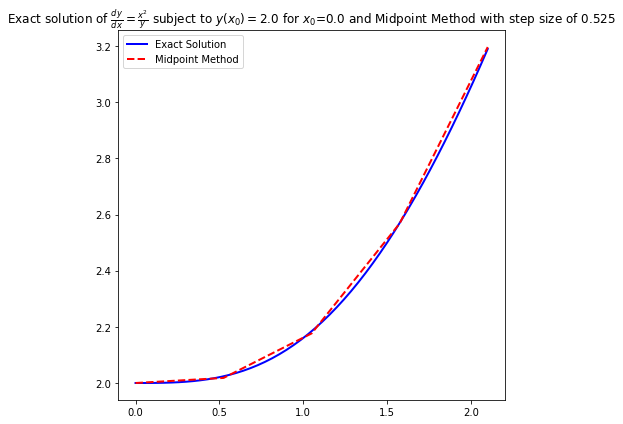

In [3]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sympy

fxy = lambda x,y: pow(x,2)/y
fxy_lhs = "dy/dx"
fxy_rhs = "x^2/y"
#fn_string = "ln(x) - 0.6931"
fxy_lhs_syms = sympy.latex(sympy.sympify(fxy_lhs))
fxy_rhs_syms = sympy.latex(sympy.sympify(fxy_rhs))

a = 0.0    #initial value for x
b = 2.1    #final value for x
x_TS = np.linspace(a,b)
y_TS = [sqrt(2*pow(num,3)/3+4) for num in x_TS] 

n = 5     #number of x values
h = (b-a)/(n-1)   #step size
x_mdpt = np.zeros(n)
y_mdpt = np.zeros(n)
y_euler = 0.0
iv = 2.0
y_mdpt[0] = iv      #initial condition
x_mdpt[0] = a

for i in range(1,n):
    x_mdpt[i] = a + i*h
    x_mid = x_mdpt[i] - h/2
    fxy_xim1 = fxy(x_mdpt[i-1],y_mdpt[i-1])
    y_euler_mdpt = y_mdpt[i-1] + fxy_xim1*h/2
    fxy_mdpt = fxy(x_mid,y_euler_mdpt)
    y_mdpt[i] = y_mdpt[i-1] + (fxy_mdpt)*h


iv_lhs = f"y(x_0)"
iv_rhs = f"{str(iv)}"
iv_lhs_syms=sympy.latex(sympy.sympify(iv_lhs))
iv_rhs_syms=sympy.latex(sympy.sympify(iv_rhs))
    
fig = plt.figure(figsize=(6,6))
plt.plot(x_TS,y_TS,label="Exact Solution",color="b",linewidth="2.0")
plt.plot(x_mdpt,y_mdpt,label="Midpoint Method",color="r",linestyle="--",linewidth="2.0")
plt.title(f"Exact solution of ${fxy_lhs_syms}={fxy_rhs_syms}$ subject to ${iv_lhs_syms}={iv_rhs_syms}$ for $x_0$={a} and Midpoint Method with step size of {h:.3f}")
plt.legend()
plt.tight_layout()
plt.show()